# Trade network analysis
**Brian Dew (brianwdew@gmail.com)**

`11_plots.ipynb`

Generates LaTeX tables with summary statistics on:

Required file:

* `imf_data_oil.csv` - created by `03oil_IFS.ipynb`
* `prod/final_"hs6"` - created by `12_product_network.ipynb`

---

METODO: 

Annotate and expand

#### Libraries

In [1]:
import pandas as pd                                         # pandas dataframes used for convenience
import os                                                   # change current directory in next line
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
matplotlib.style.use('classic')
%matplotlib inline

os.chdir('C:/Working/trade_network/data/')

#### Plot of trade and oil price

In [2]:
wti = pd.read_csv('imf_data_oil.csv', index_col='level_0').loc['DE'].reset_index().set_index('date')['@OBS_VALUE']
tx = pd.read_csv('imf_data_oil.csv').groupby(['date']).sum()["('x', u'@OBS_VALUE')"]
txwti = pd.concat([wti, tx], axis=1)
txwti.index = pd.to_datetime(txwti.index)
txwti = txwti.rename(columns={'@OBS_VALUE': 'wti', "('x', u'@OBS_VALUE')": 'tx'})
txwti['wti_ix'] = txwti['wti'] / txwti['wti'][0]
txwti['tx_ix'] = txwti['tx'] / txwti['tx'][0]
txwti[['wti_ix','tx_ix']].to_csv('tx_wti_ix.csv')

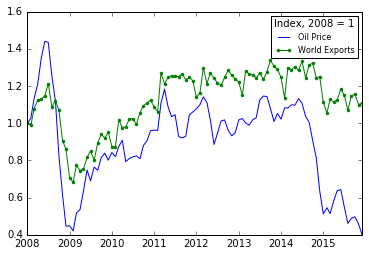

In [3]:
plt.plot(txwti['wti_ix'], label='Oil Price', linewidth=1)
plt.plot(txwti['tx_ix'], label='World Exports', linewidth=1, color='g', marker='.')
plt.legend(title='Index, 2008 = 1', loc=1, prop={'size':8})
plt.savefig('wti_ix.pdf', bbox_inches='tight')

#### Centrality scores (average) by continent

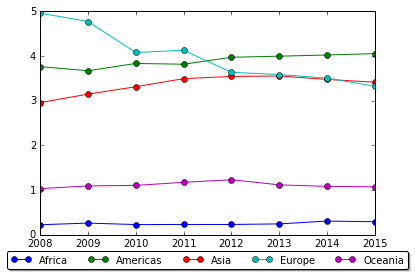

In [4]:
cont_cent = pd.read_csv('region_centrality_scores.csv', index_col='Date')
cont_cent.index = pd.to_datetime(cont_cent.index)
cont_cent.plot(linewidth=1, marker='o')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5, fontsize=10)
plt.savefig('cent_continent.pdf', bbox_inches='tight')

#### Centrality of Oil and LNG

Oil: 270900
LNG: 271111
GNG: 271121

In [5]:
# combine product summary from all years into one csv

df = {}
for y in range(2008,2015):         # start year & end year + 1 '
    df[y] = pd.read_csv('summary/product_'+str(y)+'.csv', index_col='hs6')
pd.concat(df, axis=0).to_csv('product_combined.csv')  # combine products in csv

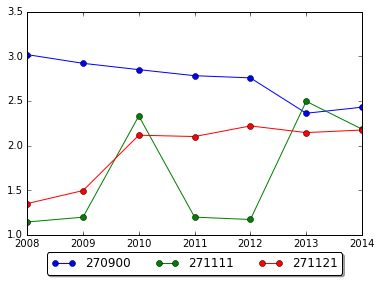

In [6]:
# keep only oil and natural gas

df = pd.read_csv('product_combined.csv', index_col=0)
df = df[df['hs6'].isin([270900, 271111, 271121])]
df.index = pd.to_datetime(df.index, format='%Y')

df1 = df.reset_index().set_index(['index', 'hs6']).unstack()['alpha']

df1.plot(linewidth=1, marker='o')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.savefig('energy_over_time_val.pdf', bbox_inches='tight')

#### Change over time by country



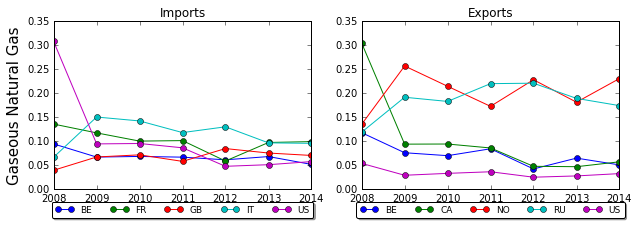

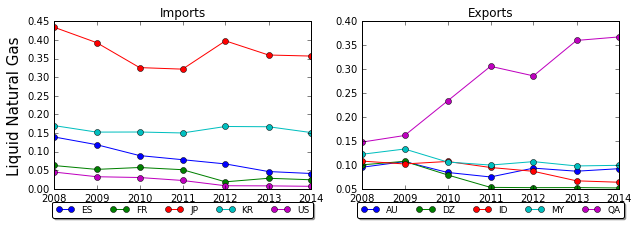

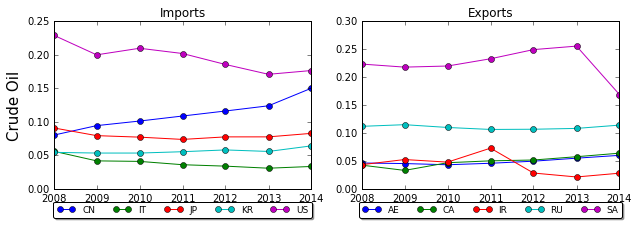

In [63]:
prods = {'270900':'Crude Oil', '271121': 'Gaseous Natural Gas', '271111': 'Liquid Natural Gas'}
for prod, prodid in prods.iteritems():
    # Importers
    dfm = pd.read_csv('prod/final_'+ prod +'.csv')
    dfm = dfm[dfm.iso2 != 'TW']
    dfm5 = dfm.query('year == 2010-01-01').sort_values('shM', ascending=False).head()['iso2'].values
    dfm = dfm[dfm['iso2'].isin(dfm5)]
    dfm['year'] = pd.to_datetime(dfm['year'], format='%Y')
    dfm = dfm.reset_index().set_index(['year','iso2']).unstack()['shM']

    # Exporters
    dfx = pd.read_csv('prod/final_'+ prod +'.csv')
    dfx5 = dfx.query('year == 2010-01-01').sort_values('shX', ascending=False).head()['iso2'].values
    dfx = dfx[dfx['iso2'].isin(dfx5)]
    dfx['year'] = pd.to_datetime(dfx['year'], format='%Y')
    dfx = dfx.reset_index().set_index(['year','iso2']).unstack()['shX']    

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))

    ax1.plot(dfm,linewidth=1, marker='o')
    ax1.set_title('Imports')
    ax1.legend(dfm, loc='upper center', bbox_to_anchor=(0.5, -0.05),
        fancybox=True, shadow=True, ncol=5, fontsize=9)
    ax1.set_ylabel(prodid, fontsize=15)

    ax2.plot(dfx,linewidth=1, marker='o')
    ax2.set_title('Exports')
    ax2.legend(dfx, loc='upper center', bbox_to_anchor=(0.5, -0.05),
        fancybox=True, shadow=True, ncol=5, fontsize=9)

    plt.tight_layout()
    plt.savefig('prod/'+ prod + '.pdf', bbox_inches='tight')

In [8]:
dfm = pd.read_csv('prod/final_'+ prod +'.csv')
dfm5 = dfm.query('year == 2010-01-01').sort_values('c_id', ascending=False).head()['iso2'].values

In [9]:
df

,hs6,v,q,i,j,alpha,sigma,name
2008-01-01,270900,1.488553e+09,2.224696e+09,107,136,3.02084,0.540093,Petroleum oils & oils obt. from bituminous mins.
2008-01-01,271111,8.838719e+07,1.593463e+08,60,85,1.14628,0.019725,Natural gas
2008-01-01,271121,1.470077e+08,5.259530e+08,50,89,1.35246,0.066610,Natural gas
2009-01-01,270900,9.346874e+08,2.195307e+09,113,144,2.92342,0.533459,Petroleum oils & oils obt. from bituminous mins.
2009-01-01,271111,6.911699e+07,1.637308e+08,67,119,1.19991,0.028558,Natural gas
2009-01-01,271121,1.071960e+08,2.774420e+08,66,93,1.49799,0.099597,Natural gas
2010-01-01,270900,1.250584e+09,2.311598e+09,118,140,2.85262,0.495133,Petroleum oils & oils obt. from bituminous mins.
2010-01-01,271111,9.158335e+07,2.169204e+08,72,128,2.33404,0.385104,Natural gas
2010-01-01,271121,1.218861e+08,3.337651e+08,56,88,2.11828,0.310155,Natural gas
2011-01-01,270900,1.734143e+09,2.350977e+09,120,148,2.78474,0.515209,Petroleum oils & oils obt. from bituminous mins.


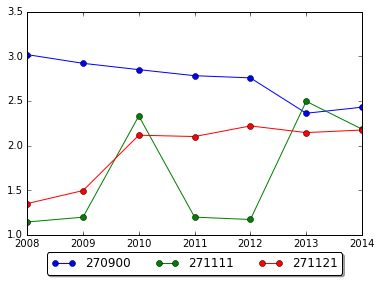

In [10]:
df.index = pd.to_datetime(df.index, format='%Y')

df1 = df.reset_index().set_index(['index', 'hs6']).unstack()['alpha']

df1.plot(linewidth=1, marker='o')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.savefig('energy_over_time_val.pdf', bbox_inches='tight')

#### Total decomposition by year



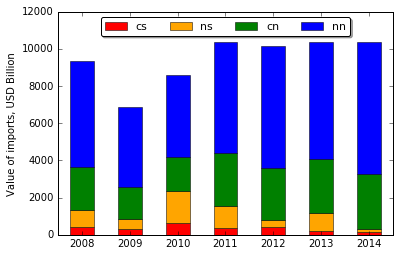

In [64]:
tot_decomp = pd.read_csv('tot_decomp.csv', index_col='date')
tot_decomp.plot(kind='bar', stacked=True, rot=0,linewidth=0.5,color=['red','orange','green','blue'])
plt.legend(loc='upper center', fancybox=True, shadow=True, ncol=5, fontsize=11)
plt.xlabel('')
plt.ylabel('Value of imports, USD Billion')
plt.savefig('tot_decomp.pdf', bbox_inches='tight')

Which products are pld

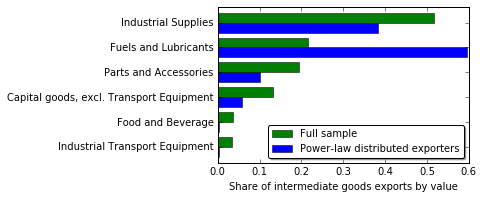

In [5]:
bec_share = pd.read_csv('hbar-2014-bec.csv', index_col='Name')
ax = bec_share.plot(kind='barh',legend=False, linewidth=0.5, width = .8, figsize = (4.5,2.8))
plt.ylabel('')
plt.xlabel('Share of intermediate goods exports by value')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='lower right', fancybox=True, shadow=True, ncol=1, fontsize=10)
plt.savefig('bec_cat.pdf', bbox_inches='tight')